In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stats.head()

,team,spi,pts.,InitialSPI,Projectedpts,spidiff
0,Man. City93 pts,93.5,93,92.1,81,1.4
1,Liverpool92 pts,93.1,92,88.7,74,4.4
2,Chelsea74 pts,88.4,74,88.8,73,-0.4
3,Tottenham71 pts,84.1,71,79.3,60,4.8
4,Arsenal69 pts,80.2,69,81.2,60,-1.0


In [6]:
stats = pd.read_csv('./SPI.csv', encoding='utf-8')
stats.columns = ['team', 'spi', 'pts', 'InitialSPI', 'Projectedpts']
stats['spidiff'] = stats.spi-stats.InitialSPI
stats['ptsdiff'] = stats.pts-stats.Projectedpts
stats.head()

,team,spi,pts,InitialSPI,Projectedpts,spidiff,ptsdiff
0,Man. City93 pts,93.5,93,92.1,81,1.4,12
1,Liverpool92 pts,93.1,92,88.7,74,4.4,18
2,Chelsea74 pts,88.4,74,88.8,73,-0.4,1
3,Tottenham71 pts,84.1,71,79.3,60,4.8,11
4,Arsenal69 pts,80.2,69,81.2,60,-1.0,9


In [7]:
from matplotlib import font_manager as fm, rcParams


In [8]:
m, b = np.polyfit(stats['spidiff'], stats['ptsdiff'], 1)


In [9]:
fpath = "./HelveticaNeue-Light.otf" 
prop = fm.FontProperties(fname=fpath)

findfont: Font family ['HelveticaNeue-Light'] not found. Falling back to DejaVu Sans.


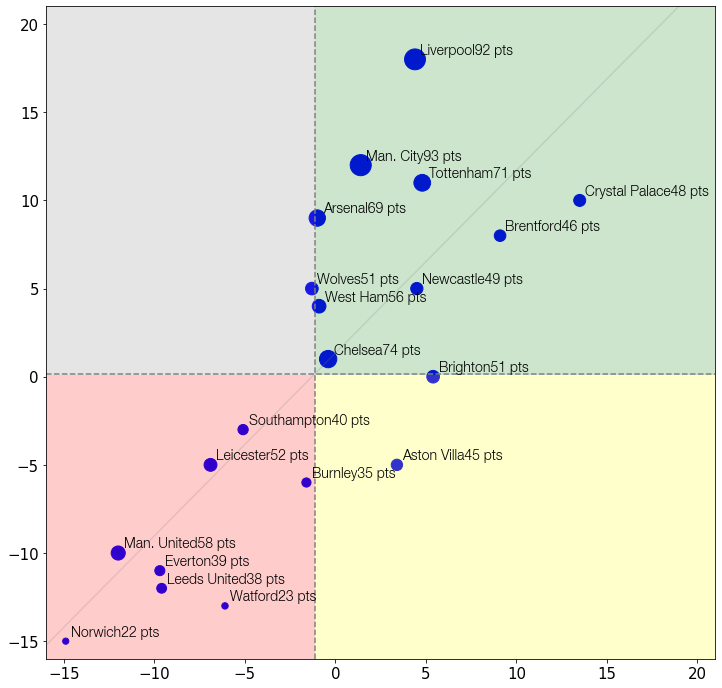

In [10]:
plt.rcParams['figure.figsize']=8,4
plt.figure(figsize = (12,12))
x = np.array([-16,21])
plt.plot(x, m*x + b, c = 'gray', alpha = 0.2)
s = [(x**1.7)/5 for x in stats['pts']]
plt.scatter(stats['spidiff'], stats['ptsdiff'], c = 'blue', s = s)
for name in np.array(stats.team):
    plt.text(stats.spidiff[stats.team==name]+0.3,stats.ptsdiff[stats.team==name]+0.3,name, 
             color='black', size = 14, fontproperties=prop, fontname = 'HelveticaNeue-Light' )
    
plt.plot([np.mean(stats['spidiff']), np.mean(stats['spidiff'])], [-16, 21], '--', c = 'grey' )
plt.plot([-16, 21], [np.mean(stats['ptsdiff']), np.mean(stats['ptsdiff'])], '--', c = 'grey')
plt.xlim(-16,21)
plt.ylim(-16,21)
plt.axvspan(-16, np.mean(stats['spidiff']), ymin=0.435, ymax=21, facecolor='grey', alpha=0.2, )
plt.axvspan(np.mean(stats['spidiff']), 21, ymin=0.435, ymax=21, facecolor='green', alpha=0.2, )
plt.axvspan(-16, np.mean(stats['spidiff']), ymin=-15, ymax=0.435, facecolor='red', alpha=0.2, )
plt.axvspan(np.mean(stats['spidiff']), 21, ymin=-15, ymax=0.435, facecolor='yellow', alpha=0.2, )
plt.xticks(size = 15, fontproperties=prop, fontname = 'HelveticaNeue-Light' )
plt.yticks(size = 15, fontproperties=prop, fontname = 'HelveticaNeue-Light' )
plt.savefig('./SPI-plot.png', dpi = 1000)
plt.show()